In [169]:
import pandas as pd

blue_O1 = pd.read_csv("color_logs/signal_blue/signal/O1.csv")
blue_O2 = pd.read_csv("color_logs/signal_blue/signal/O2.csv")
blue_T3 = pd.read_csv("color_logs/signal_blue/signal/T3.csv")
blue_T4 = pd.read_csv("color_logs/signal_blue/signal/T4.csv")

red_O1 = pd.read_csv("color_logs/signal_red/signal/O1.csv")
red_O2 = pd.read_csv("color_logs/signal_red/signal/O2.csv")
red_T3 = pd.read_csv("color_logs/signal_red/signal/T3.csv")
red_T4 = pd.read_csv("color_logs/signal_red/signal/T4.csv")

green_O1 = pd.read_csv("color_logs/signal_green/signal/O1.csv")
green_O2 = pd.read_csv("color_logs/signal_green/signal/O2.csv")
green_T3 = pd.read_csv("color_logs/signal_green/signal/T3.csv")
green_T4 = pd.read_csv("color_logs/signal_green/signal/T4.csv")



blue_O1.drop(columns=["timestamp"], inplace=True)
blue_O2.drop(columns=["timestamp"], inplace=True)
blue_T3.drop(columns=["timestamp"], inplace=True)
blue_T4.drop(columns=["timestamp"], inplace=True)


red_O1.drop(columns=["timestamp"], inplace=True)
red_O2.drop(columns=["timestamp"], inplace=True)
red_T3.drop(columns=["timestamp"], inplace=True)
red_T4.drop(columns=["timestamp"], inplace=True)


green_O1.drop(columns=["timestamp"], inplace=True)
green_O2.drop(columns=["timestamp"], inplace=True)
green_T3.drop(columns=["timestamp"], inplace=True)
green_T4.drop(columns=["timestamp"], inplace=True)

C:\Users\er321\AppData\Local\Temp\ipykernel_26188\2834405231.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Blue T3', 'Blue T4', 'Red O1', 'Red O2', 'Red T3', 'Red T4', 'Green O1', 'Green O2', 'Green T3', 'Green T4'])


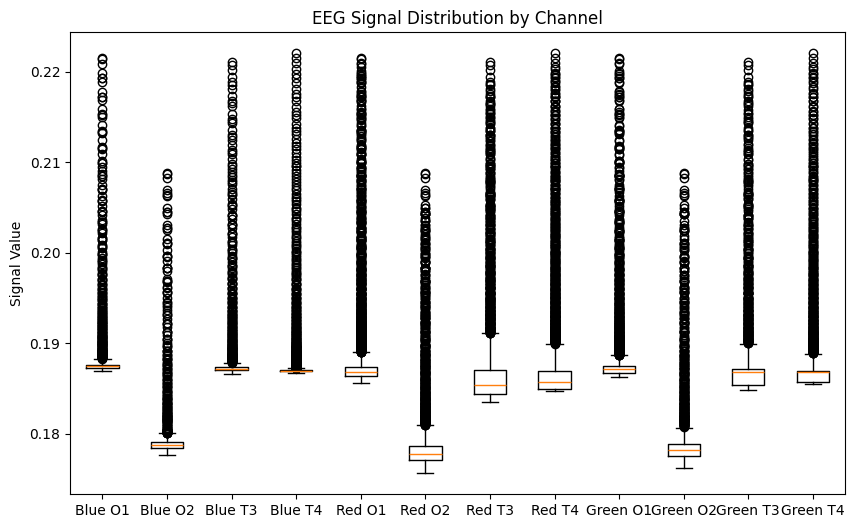

In [170]:
# display boxplots for all channels
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create boxplots for all channels
data = [blue_O1['value'], blue_O2['value'], blue_T3['value'], blue_T4['value'],
        red_O1['value'], red_O2['value'], red_T3['value'], red_T4['value'],
        green_O1['value'], green_O2['value'], green_T3['value'], green_T4['value']]
plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Blue T3', 'Blue T4', 'Red O1', 'Red O2', 'Red T3', 'Red T4', 'Green O1', 'Green O2', 'Green T3', 'Green T4'])

# Customize the plot
plt.title('EEG Signal Distribution by Channel')
plt.ylabel('Signal Value')

# Display the plot
plt.show()


In [171]:
# remove outliers using MAD (Median Absolute Deviation)
def remove_outliers_mad(df, threshold=3):
    median = df['value'].median()
    mad = (df['value'] - median).abs().median() * 1.4826
    modified_zscore = (df['value'] - median).abs() / mad
    return df[modified_zscore < threshold]

blue_O1 = remove_outliers_mad(blue_O1)
blue_O2 = remove_outliers_mad(blue_O2)
blue_T3 = remove_outliers_mad(blue_T3)
blue_T4 = remove_outliers_mad(blue_T4)

red_O1 = remove_outliers_mad(red_O1)
red_O2 = remove_outliers_mad(red_O2)
red_T3 = remove_outliers_mad(red_T3)
red_T4 = remove_outliers_mad(red_T4)

green_O1 = remove_outliers_mad(green_O1)
green_O2 = remove_outliers_mad(green_O2)
green_T3 = remove_outliers_mad(green_T3)
green_T4 = remove_outliers_mad(green_T4)



C:\Users\er321\AppData\Local\Temp\ipykernel_26188\2834405231.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Blue T3', 'Blue T4', 'Red O1', 'Red O2', 'Red T3', 'Red T4', 'Green O1', 'Green O2', 'Green T3', 'Green T4'])


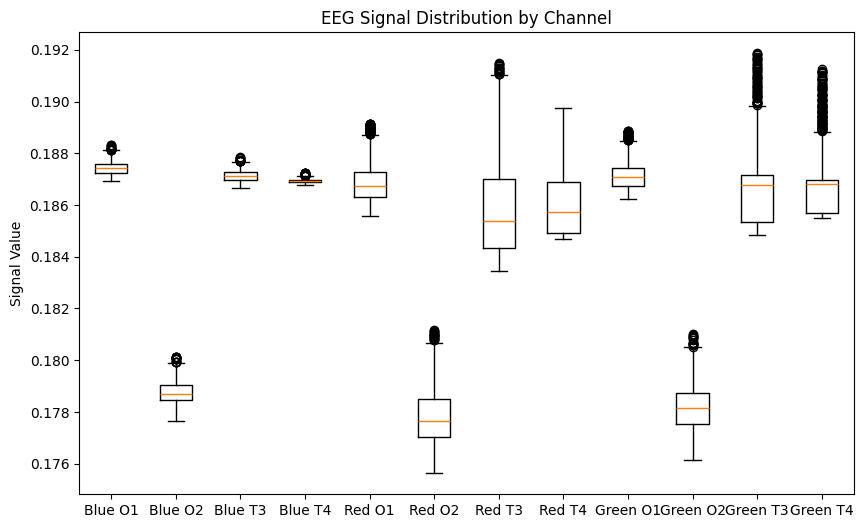

In [172]:
# display boxplots for all channels
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create boxplots for all channels
data = [blue_O1['value'], blue_O2['value'], blue_T3['value'], blue_T4['value'],
        red_O1['value'], red_O2['value'], red_T3['value'], red_T4['value'],
        green_O1['value'], green_O2['value'], green_T3['value'], green_T4['value']]
plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Blue T3', 'Blue T4', 'Red O1', 'Red O2', 'Red T3', 'Red T4', 'Green O1', 'Green O2', 'Green T3', 'Green T4'])

# Customize the plot
plt.title('EEG Signal Distribution by Channel')
plt.ylabel('Signal Value')

# Display the plot
plt.show()


In [173]:
# add labels
# Align the lengths of blue_O1 and blue_O2 and create a new DataFrame with columns "O1" and "O2"
min_len = min(len(blue_O1), len(blue_O2), len(blue_T3), len(blue_T4))
blue_df = pd.DataFrame({
    "O1": blue_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": blue_O2["value"].iloc[:min_len].reset_index(drop=True),
    "T3": blue_T3["value"].iloc[:min_len].reset_index(drop=True),
    "T4": blue_T4["value"].iloc[:min_len].reset_index(drop=True)
})

min_len = min(len(red_O1), len(red_O2), len(red_T3), len(red_T4))
red_df = pd.DataFrame({
    "O1": red_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": red_O2["value"].iloc[:min_len].reset_index(drop=True),
    "T3": red_T3["value"].iloc[:min_len].reset_index(drop=True),
    "T4": red_T4["value"].iloc[:min_len].reset_index(drop=True)
})

min_len = min(len(green_O1), len(green_O2), len(green_T3), len(green_T4))
green_df = pd.DataFrame({
    "O1": green_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": green_O2["value"].iloc[:min_len].reset_index(drop=True),
    "T3": green_T3["value"].iloc[:min_len].reset_index(drop=True),
    "T4": green_T4["value"].iloc[:min_len].reset_index(drop=True)
})

blue_df['label'] = 'blue'
red_df['label'] = 'red'
green_df['label'] = 'green'

df = pd.concat([blue_df, red_df])

print(df.head())


         O1        O2        T3        T4 label
0  0.188300  0.180128  0.187827  0.187222  blue
1  0.188247  0.179872  0.187847  0.187213  blue
2  0.188219  0.179713  0.187721  0.187206  blue
3  0.188181  0.180037  0.187758  0.187189  blue
4  0.188110  0.180107  0.187641  0.187180  blue


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [175]:
x = df[["O1", "O2", "T3", "T4"]]
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LogisticRegression(class_weight="balanced")
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [176]:
print(x_test.head())

            O1        O2        T3        T4
1956  0.187301  0.179099  0.187193  0.187013
2508  0.186379  0.176434  0.184906  0.185724
2033  0.187862  0.178744  0.187456  0.187061
1060  0.187079  0.179189  0.187015  0.186930
732   0.187480  0.178621  0.187131  0.186955


In [177]:
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       0.44      1.00      0.61       384
         red       1.00      0.63      0.77      1313

    accuracy                           0.71      1697
   macro avg       0.72      0.81      0.69      1697
weighted avg       0.87      0.71      0.74      1697



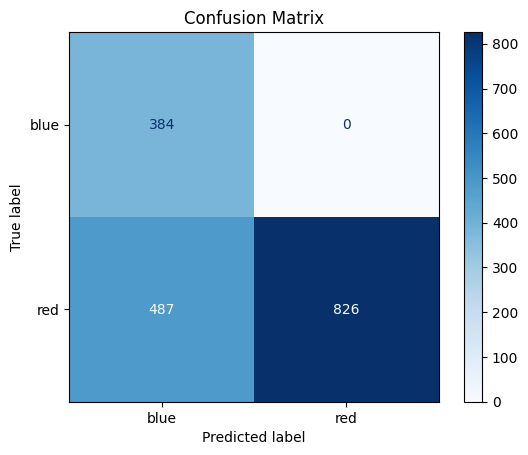

In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix using the true labels and predictions
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Create a confusion matrix display and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [179]:
# import joblib

# # Save the trained model to a file
# joblib.dump(model, 'eeg_color_classifier.joblib')
